In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import seaborn as sns; sns.set()
from pandas import ExcelWriter

In [2]:
df = pd.read_excel('Aid_aggregate_data.xlsx') # read excel data

# Data Exploration

### Plot aid received over time and food security indicators over time

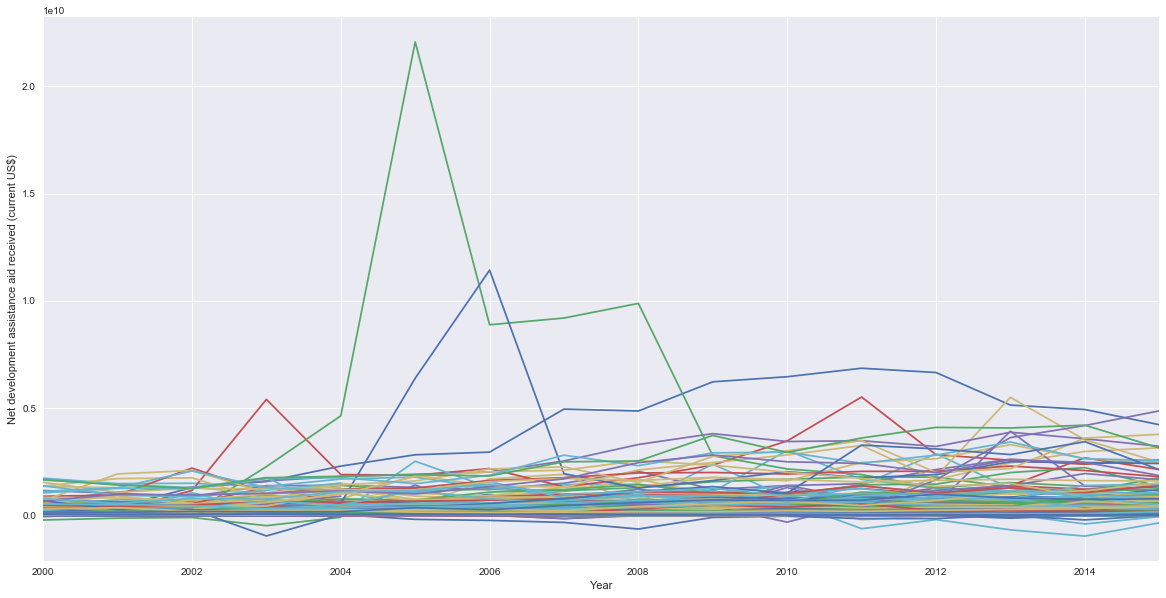

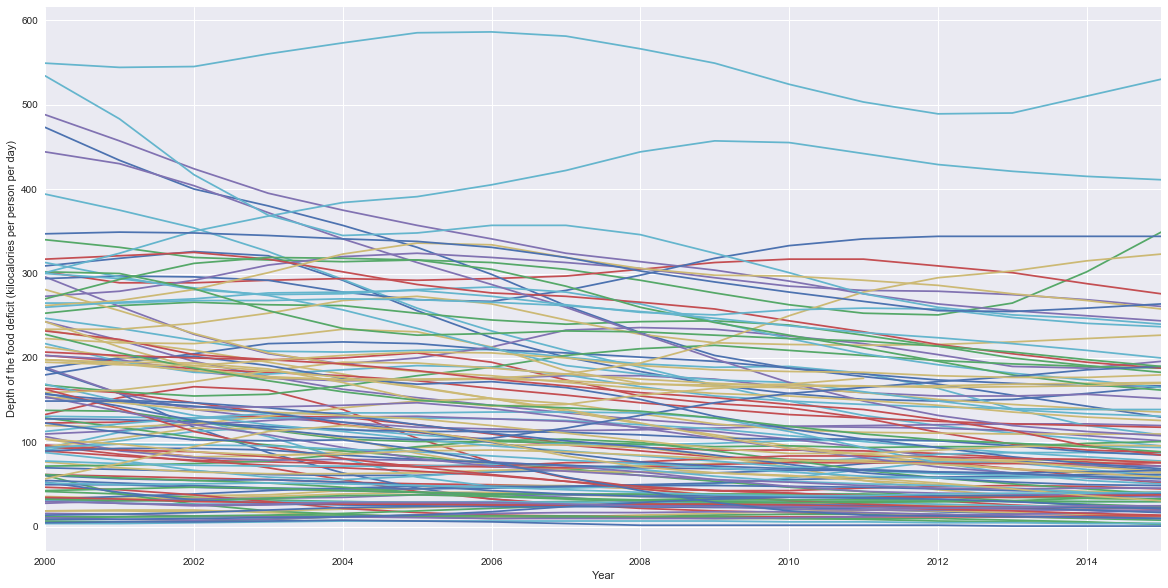

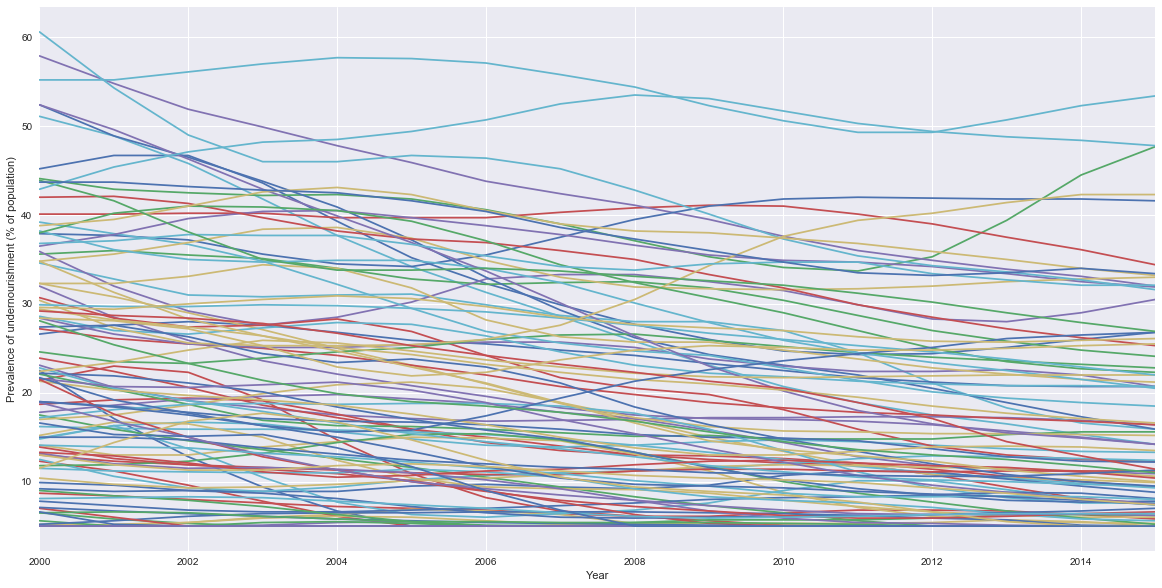

In [3]:
# Extract net ODA to plot
assistance = df.loc[df['Indicator Name'] == 'Net official development assistance and official aid received (current US$)']
assistance_plt = assistance.set_index('Country Name') # Set index as country names
assistance_plt = assistance_plt.loc[:,'2000':] # Select data from 2000 onwards
assistance_plt = assistance_plt.T # Transpose / swap axis
ax = assistance_plt.plot(legend=None, figsize=(20,10))
ax.set_xlabel("Year")
ax.set_ylabel("Net development assistance aid received (current US$)")
plt.show(ax)

# Extract Depth of the food deficit (kilocalories per person per day) to plot
deficit = df.loc[df['Indicator Name'] == 'Depth of the food deficit (kilocalories per person per day)']
deficit_plt = deficit.set_index('Country Name') # Set index as country names
deficit_plt = deficit_plt.loc[:,'2000':] # Select data from 2000 onwards
deficit_plt = deficit_plt.T # Transpose / swap axis
ax2 = deficit_plt.plot(legend=None, figsize=(20,10))
ax2.set_xlabel("Year")
ax2.set_ylabel("Depth of the food deficit (kilocalories per person per day)")
plt.show(ax2)

# Extract Prevalence of undernourishment (% of population) to plot
deficit_2 = df.loc[df['Indicator Name'] == 'Prevalence of undernourishment (% of population)']
deficit_2_plt = deficit_2.set_index('Country Name') # Set index as country names
deficit_2_plt = deficit_2_plt.loc[:,'2000':] # Select data from 2000 onwards
deficit_2_plt = deficit_2_plt.T # Transpose / swap axis
ax2 = deficit_2_plt.plot(legend=None, figsize=(20,10))
ax2.set_xlabel("Year")
ax2.set_ylabel("Prevalence of undernourishment (% of population)")
plt.show(ax2)

### Plot aid vs food security indicators for various countries to get an idea of what kind of relationships exist

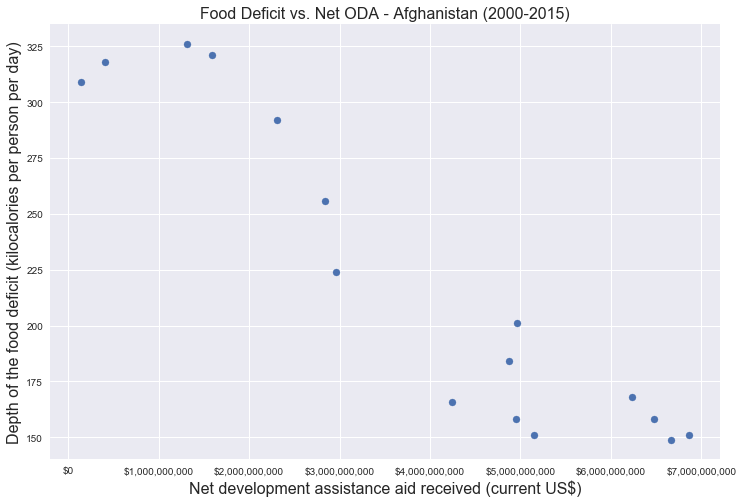

In [4]:
# Create figure object
fig = plt.figure(figsize=(12, 8))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(assistance_plt['Afghanistan'], deficit_plt['Afghanistan'])
# Add a title.
ax.set_title("Food Deficit vs. Net ODA - Afghanistan (2000-2015)",size = 16)
# Add some axis labels.
ax.set_xlabel("Net development assistance aid received (current US$)",size = 16)
ax.set_ylabel("Depth of the food deficit (kilocalories per person per day)",size = 16)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.show()

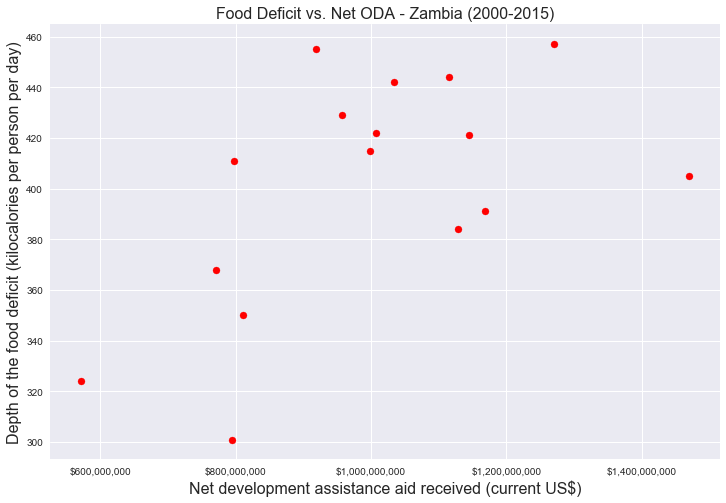

In [5]:
# Create figure object
fig = plt.figure(figsize=(12, 8))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(assistance_plt['Zambia'], deficit_plt['Zambia'], color='red')
# Add a title.
ax.set_title("Food Deficit vs. Net ODA - Zambia (2000-2015)",size = 16)
# Add some axis labels.
ax.set_xlabel("Net development assistance aid received (current US$)",size = 16)
ax.set_ylabel("Depth of the food deficit (kilocalories per person per day)",size = 16)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.show()

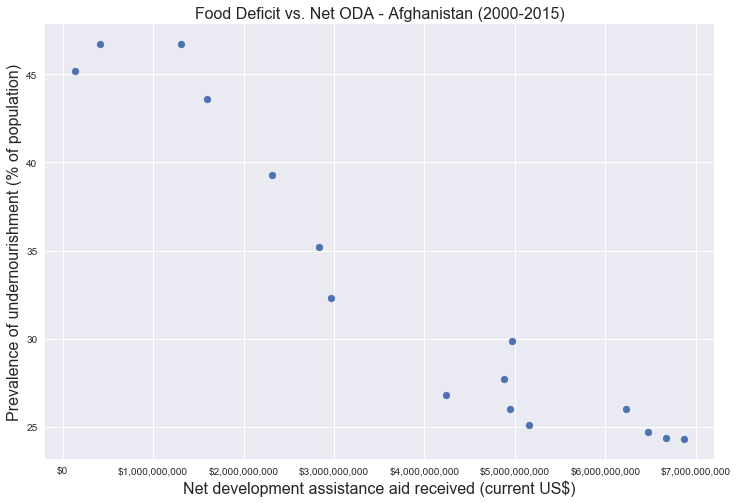

In [6]:
# Create figure object
fig = plt.figure(figsize=(12, 8))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(assistance_plt['Afghanistan'], deficit_2_plt['Afghanistan'])
# Add a title.
ax.set_title("Food Deficit vs. Net ODA - Afghanistan (2000-2015)",size = 16)
# Add some axis labels.
ax.set_xlabel("Net development assistance aid received (current US$)",size = 16)
ax.set_ylabel("Prevalence of undernourishment (% of population)",size = 16)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.show()

# Step 1. Determine if there is significant correlation between net ODA per capita and Depth of food deficit for each country

In [7]:
# Create dataframe with desired columns
data = df[df['Indicator Name'].isin(['Depth of the food deficit (kilocalories per person per day)', 'Net ODA received per capita (current US$)'])]
test_country=data.loc[data['Country Name'] == 'Cabo Verde'] # Output test
test_country

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
576,Cabo Verde,CPV,Net ODA received per capita (current US$),217.546698,175.923338,204.598037,315.833853,307.44295,343.197062,289.333292,341.359022,451.229656,395.94497,650.856715,494.757581,477.918359,471.365452,439.539774,286.294386
586,Cabo Verde,CPV,Depth of the food deficit (kilocalories per pe...,123.000000,124.000000,129.000000,131.000000,130.00000,121.000000,110.000000,99.000000,94.000000,91.00000,91.000000,90.000000,87.000000,82.000000,77.000000,72.000000


In [8]:
# Initialize empty results list
results=[]

# Store the Country List
countries = data['Country Name'].unique()

for i in countries: # Iterate through the countries
    test_country=data.loc[data['Country Name'] == i] # Get the data in rows associated with country i
    aid_rec = test_country.loc[test_country['Indicator Name'] == 'Net ODA received per capita (current US$)'] # Get row of interest for each country
    
    if np.isnan(np.sum(aid_rec.iloc[0,3:])) == False: # Test if the vector contains only NaN i.e. no aid received
        test_country = test_country.fillna(0) # If some aid was received, then replace any NaN with 0 and perform correlation
        pearson = pearsonr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Pearson correlation and significance level
        spear = spearmanr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Spearman correlation and significance level
        results.append([i,pearson[0],pearson[1], spear[0],spear[1]]) # Add country name, Pearson coeff and sig. level to results list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramD

In [9]:
# Note on results: if a country has NaN pearson coeff. it means the country received some aid between 2000-2015 but had no recorded 'depth of the food deficit'
results_df=pd.DataFrame(results,columns=['Country Name','Pearson Coefficient', 'Pearson p-Value', 'Spearman Coefficient', 'Spearman p-Value'])
results_df

,Country Name,Pearson Coefficient,Pearson p-Value,Spearman Coefficient,Spearman p-Value
0,Afghanistan,-0.887917,4.409269e-06,-0.833580,6.031786e-05
1,Albania,NaN,1.000000e+00,NaN,NaN
2,Algeria,0.584560,1.739985e-02,0.588235,1.653972e-02
3,Angola,0.492850,5.242019e-02,0.650000,6.415707e-03
4,Antigua and Barbuda,NaN,1.000000e+00,NaN,NaN
5,Argentina,0.468004,6.752334e-02,0.338800,1.992678e-01
6,Armenia,-0.577811,1.906934e-02,-0.696613,2.714795e-03
7,Azerbaijan,0.273728,3.049578e-01,0.325239,2.190008e-01
8,Bahrain,NaN,1.000000e+00,NaN,NaN
9,Bangladesh,-0.330588,2.110749e-01,-0.192931,4.740574e-01


In [10]:
results_fin = results_df[np.isfinite(results_df['Pearson Coefficient'])] # Select only entries where Pearson coeff is not NaN
results_fin = results_fin.set_index('Country Name') # Set index as country names
num_cty_aid = results_fin.shape[0] # Get number of countries that received aid and had recorded values of 'depth of food deficit'

# Select only entries where Pearson p-Value is significant (i.e. <0.05)
results_fin_prs = results_fin[results_fin["Pearson p-Value"] < 0.05]
num_cty_aid_sig = results_fin_prs.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Select only entries where Spearman p-Value is significant
results_fin_spr = results_fin[results_fin["Spearman p-Value"] < 0.05]
num_cty_aid_sig_spr = results_fin_spr.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

In [11]:
# Compute percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit
print('Percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit (Pearson) ', round((num_cty_aid_sig/num_cty_aid)*100,2)) 
print('Percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit (Spearman) ', round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

Percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit (Pearson)  43.75
Percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit (Spearman)  51.79


In [12]:
results_list = [] # initialize results list for plotting
results_list.append(round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

# Step 2. Repeat analysis using Prevalence of undernourishment (% of population) as indicator of food security

In [13]:
test_country = None # Clear test_country
aid_rec = None # Clear aid_rec

# Create dataframe with desired columns
data = df[df['Indicator Name'].isin(['Prevalence of undernourishment (% of population)', 'Net ODA received per capita (current US$)'])]
test_country=data.loc[data['Country Name'] == 'Djibouti'] # Output test
test_country

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
972,Djibouti,DJI,Net ODA received per capita (current US$),100.671141,81.068798,99.300341,104.479875,83.463942,94.694697,144.911882,139.213889,171.119434,198.174083,155.120273,163.291325,168.262056,166.445854,180.592525,182.830969
976,Djibouti,DJI,Prevalence of undernourishment (% of population),52.400000,48.900000,46.500000,43.800000,40.900000,37.200000,33.000000,29.300000,26.200000,24.300000,23.100000,22.000000,20.500000,18.900000,17.300000,15.900000


In [14]:
# Initialize empty results list
results2=[]

# Store the Country List
countries = data['Country Name'].unique()

for i in countries: # Iterate through the countries
    test_country=data.loc[data['Country Name'] == i] # Get the data in rows associated with country i
    aid_rec = test_country.loc[test_country['Indicator Name'] == 'Net ODA received per capita (current US$)'] # Get row of interest for each country
    
    if np.isnan(np.sum(aid_rec.iloc[0,3:])) == False: # Test if the vector contains only NaN i.e. no aid received
        test_country = test_country.fillna(0) # If some aid was received, then replace any NaN with 0 and perform correlation
        pearson = pearsonr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Pearson correlation and significance level
        spear = spearmanr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Spearman correlation and significance level
        results2.append([i,pearson[0],pearson[1], spear[0],spear[1]]) # Add country name, Pearson coeff and sig. level to results list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramD

In [15]:
# Note on results: if a country has NaN pearson coeff. it means the country received some aid between 2000-2015 but had no recorded food security indicator
results_df2=pd.DataFrame(results2,columns=['Country Name','Pearson Coefficient', 'Pearson p-Value', 'Spearman Coefficient', 'Spearman p-Value'])
results_df2

,Country Name,Pearson Coefficient,Pearson p-Value,Spearman Coefficient,Spearman p-Value
0,Afghanistan,-0.916762,5.943864e-07,-0.916054,6.294867e-07
1,Albania,NaN,1.000000e+00,NaN,NaN
2,Algeria,0.387714,1.378559e-01,0.582154,1.798129e-02
3,Angola,0.474493,6.330517e-02,0.650000,6.415707e-03
4,Antigua and Barbuda,NaN,1.000000e+00,NaN,NaN
5,Argentina,NaN,1.000000e+00,NaN,NaN
6,Armenia,-0.522182,3.799402e-02,-0.679442,3.791302e-03
7,Azerbaijan,0.167690,5.347517e-01,0.218136,4.170169e-01
8,Bahrain,NaN,1.000000e+00,NaN,NaN
9,Bangladesh,-0.433623,9.334931e-02,-0.485972,5.632172e-02


In [16]:
results_fin2 = results_df2[np.isfinite(results_df2['Pearson Coefficient'])] # Select only entries where Pearson coeff is not NaN
results_fin2 = results_fin2.set_index('Country Name') # Set index as country names
num_cty_aid = results_fin2.shape[0] # Get number of countries that received aid and had recorded values of 'depth of food deficit'

# Select only entries where Pearson p-Value is significant (i.e. <0.05)
results_fin_prs2 = results_fin2[results_fin2["Pearson p-Value"] < 0.05]
num_cty_aid_sig = results_fin_prs2.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Select only entries where Spearman p-Value is significant
results_fin_spr2 = results_fin2[results_fin2["Spearman p-Value"] < 0.05]
num_cty_aid_sig_spr = results_fin_spr2.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

In [17]:
# Compute percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit
print('Percent of countries that received aid and had sig. correlation between aid per capita and undernourishment (Pearson)', round((num_cty_aid_sig/num_cty_aid)*100,2)) 
print('Percent of countries that received aid and had sig. correlation between aid per capita and undernourishment (Spearman)', round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

Percent of countries that received aid and had sig. correlation between aid per capita and undernourishment (Pearson) 46.94
Percent of countries that received aid and had sig. correlation between aid per capita and undernourishment (Spearman) 55.1


In [18]:
results_list.append(round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

# Step 3. Repeat analysis using Net official development assistance and official aid received (current US dollars) as the input

In [19]:
# Create dataframe with desired columns
data = df[df['Indicator Name'].isin(['Depth of the food deficit (kilocalories per person per day)', 'Net official development assistance and official aid received (current US$)'])]
test_country=data.loc[data['Country Name'] == 'Cabo Verde'] # Output test
test_country

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
578,Cabo Verde,CPV,Net official development assistance and offici...,94650000.0,78060000.0,92500000.0,145330000.0,143780000.0,162870000.0,139110000.0,166050000.0,221880000.0,196770000.0,326980000.0,251370000.0,245640000.0,245160000.0,231390000.0,152570000.0
586,Cabo Verde,CPV,Depth of the food deficit (kilocalories per pe...,123.0,124.0,129.0,131.0,130.0,121.0,110.0,99.0,94.0,91.0,91.0,90.0,87.0,82.0,77.0,72.0


In [20]:
# Initialize empty results list
results4=[]

# Store the Country List
countries = data['Country Name'].unique()

for i in countries: # Iterate through the countries
    test_country=data.loc[data['Country Name'] == i] # Get the data in rows associated with country i
    aid_rec = test_country.loc[test_country['Indicator Name'] == 'Net official development assistance and official aid received (current US$)'] # Get row of interest for each country
    
    if np.isnan(np.sum(aid_rec.iloc[0,3:])) == False: # Test if the vector contains only NaN i.e. no aid received
        test_country = test_country.fillna(0) # If some aid was received, then replace any NaN with 0 and perform correlation
        pearson = pearsonr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Pearson correlation and significance level
        spear = spearmanr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Spearman correlation and significance level
        results4.append([i,pearson[0],pearson[1], spear[0],spear[1]]) # Add country name, Pearson coeff and sig. level to results list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramD

In [21]:
# Note on results: if a country has NaN pearson coeff. it means the country received some aid between 2000-2015 but had no recorded food security indicator
results_df4=pd.DataFrame(results4,columns=['Country Name','Pearson Coefficient', 'Pearson p-Value', 'Spearman Coefficient', 'Spearman p-Value'])
results_df4

,Country Name,Pearson Coefficient,Pearson p-Value,Spearman Coefficient,Spearman p-Value
0,Afghanistan,-0.939780,6.561609e-08,-0.907217,1.238245e-06
1,Albania,NaN,1.000000e+00,NaN,NaN
2,Algeria,0.463015,7.090268e-02,0.347059,1.878344e-01
3,Angola,0.336252,2.028842e-01,0.417647,1.074741e-01
4,Antigua and Barbuda,NaN,1.000000e+00,NaN,NaN
5,Argentina,0.486710,5.589337e-02,0.338800,1.992678e-01
6,Armenia,-0.539338,3.108000e-02,-0.690722,3.051842e-03
7,Aruba,NaN,1.000000e+00,NaN,NaN
8,Azerbaijan,0.186056,4.902477e-01,0.222222,4.081220e-01
9,"Bahamas, The",NaN,1.000000e+00,NaN,NaN


In [22]:
results_fin4 = results_df4[np.isfinite(results_df4['Pearson Coefficient'])] # Select only entries where Pearson coeff is not NaN
results_fin4 = results_fin4.set_index('Country Name') # Set index as country names
num_cty_aid = results_fin4.shape[0] # Get number of countries that received aid and had recorded values of 'depth of food deficit'

# Select only entries where Pearson p-Value is significant (i.e. <0.05)
results_fin_prs4 = results_fin4[results_fin4["Pearson p-Value"] < 0.05]
num_cty_aid_sig = results_fin_prs4.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Select only entries where Spearman p-Value is significant
results_fin_spr4 = results_fin4[results_fin4["Spearman p-Value"] < 0.05]
num_cty_aid_sig_spr = results_fin_spr4.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

In [23]:
# Compute percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit
print('Percent of countries that received aid and had sig. correlation between net aid and depth of food deficit (Pearson) ', round((num_cty_aid_sig/num_cty_aid)*100,2)) 
print('Percent of countries that received aid and had sig. correlation between net aid and depth of food deficit (Spearman) ', round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

Percent of countries that received aid and had sig. correlation between net aid and depth of food deficit (Pearson)  49.14
Percent of countries that received aid and had sig. correlation between net aid and depth of food deficit (Spearman)  53.45


In [24]:
results_list.append(round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

# Step 4. Repeat analysis using Prevalence of undernourishment (% of population) as indicator of food security and Net official development assistance and official aid received (current US dollars) as the input

In [25]:
# Create dataframe with desired columns
data = df[df['Indicator Name'].isin(['Prevalence of undernourishment (% of population)', 'Net official development assistance and official aid received (current US$)'])]
test_country=data.loc[data['Country Name'] == 'Cabo Verde'] # Output test
test_country

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
578,Cabo Verde,CPV,Net official development assistance and offici...,94650000.0,78060000.0,92500000.0,145330000.0,143780000.0,162870000.0,139110000.0,166050000.0,221880000.0,196770000.0,326980000.0,251370000.0,245640000.0,245160000.0,231390000.0,152570000.0
580,Cabo Verde,CPV,Prevalence of undernourishment (% of population),18.7,19.2,19.4,19.1,17.6,15.9,14.4,13.5,13.0,12.9,12.6,12.1,11.4,10.6,10.0,9.4


In [26]:
# Initialize empty results list
results5=[]

# Store the Country List
countries = data['Country Name'].unique()

for i in countries: # Iterate through the countries
    test_country=data.loc[data['Country Name'] == i] # Get the data in rows associated with country i
    aid_rec = test_country.loc[test_country['Indicator Name'] == 'Net official development assistance and official aid received (current US$)'] # Get row of interest for each country
    
    if np.isnan(np.sum(aid_rec.iloc[0,3:])) == False: # Test if the vector contains only NaN i.e. no aid received
        test_country = test_country.fillna(0) # If some aid was received, then replace any NaN with 0 and perform correlation
        pearson = pearsonr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Pearson correlation and significance level
        spear = spearmanr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Spearman correlation and significance level
        results5.append([i,pearson[0],pearson[1], spear[0],spear[1]]) # Add country name, Pearson coeff and sig. level to results list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramD

In [27]:
# Note on results: if a country has NaN pearson coeff. it means the country received some aid between 2000-2015 but had no recorded food security indicator
results_df5=pd.DataFrame(results5,columns=['Country Name','Pearson Coefficient', 'Pearson p-Value', 'Spearman Coefficient', 'Spearman p-Value'])
results_df5

,Country Name,Pearson Coefficient,Pearson p-Value,Spearman Coefficient,Spearman p-Value
0,Afghanistan,-0.953172,1.169446e-08,-0.963182,2.230774e-09
1,Albania,NaN,1.000000e+00,NaN,NaN
2,Algeria,0.247627,3.551332e-01,0.331380,2.099163e-01
3,Angola,0.316515,2.323313e-01,0.417647,1.074741e-01
4,Antigua and Barbuda,NaN,1.000000e+00,NaN,NaN
5,Argentina,NaN,1.000000e+00,NaN,NaN
6,Armenia,-0.482981,5.808362e-02,-0.667651,4.711659e-03
7,Aruba,NaN,1.000000e+00,NaN,NaN
8,Azerbaijan,0.093801,7.296953e-01,0.153768,5.696433e-01
9,"Bahamas, The",NaN,1.000000e+00,NaN,NaN


In [28]:
results_fin5 = results_df5[np.isfinite(results_df5['Pearson Coefficient'])] # Select only entries where Pearson coeff is not NaN
results_fin5 = results_fin5.set_index('Country Name') # Set index as country names
num_cty_aid = results_fin5.shape[0] # Get number of countries that received aid and had recorded values of 'depth of food deficit'

# Select only entries where Pearson p-Value is significant (i.e. <0.05)
results_fin_prs5 = results_fin5[results_fin5["Pearson p-Value"] < 0.05]
num_cty_aid_sig = results_fin_prs5.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Select only entries where Spearman p-Value is significant
results_fin_spr5 = results_fin5[results_fin5["Spearman p-Value"] < 0.05]
num_cty_aid_sig_spr = results_fin_spr5.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

In [29]:
# Compute percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit
print('Percent of countries that received aid and had sig. correlation between net aid and Prevalence of undernourishment (% of population) (Pearson) ', round((num_cty_aid_sig/num_cty_aid)*100,2)) 
print('Percent of countries that received aid and had sig. correlation between net aid and Prevalence of undernourishment (% of population) (Spearman) ', round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

Percent of countries that received aid and had sig. correlation between net aid and Prevalence of undernourishment (% of population) (Pearson)  50.0
Percent of countries that received aid and had sig. correlation between net aid and Prevalence of undernourishment (% of population) (Spearman)  59.18


In [30]:
results_list.append(round((num_cty_aid_sig_spr/num_cty_aid)*100,2))

### Aggregate and plot results

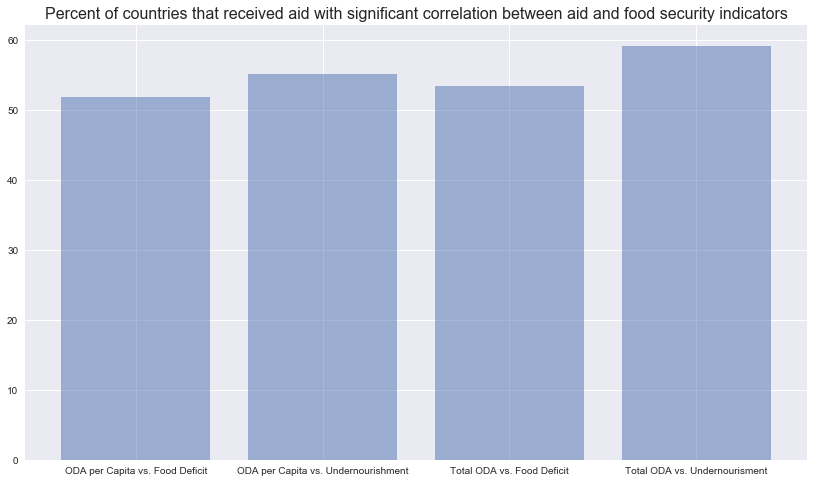

In [31]:
categories = ['ODA per Capita vs. Food Deficit','ODA per Capita vs. Undernourishment','Total ODA vs. Food Deficit', 'Total ODA vs. Undernourisment']

# Create figure object
fig = plt.figure(figsize=(14, 8))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# Plot the data.
plt.bar(np.arange(4), results_list, alpha=0.5)
# Add a title.
ax.set_title("Percent of countries that received aid with significant correlation between aid and food security indicators",size = 16)
plt.xticks(np.arange(4), categories)

plt.show()

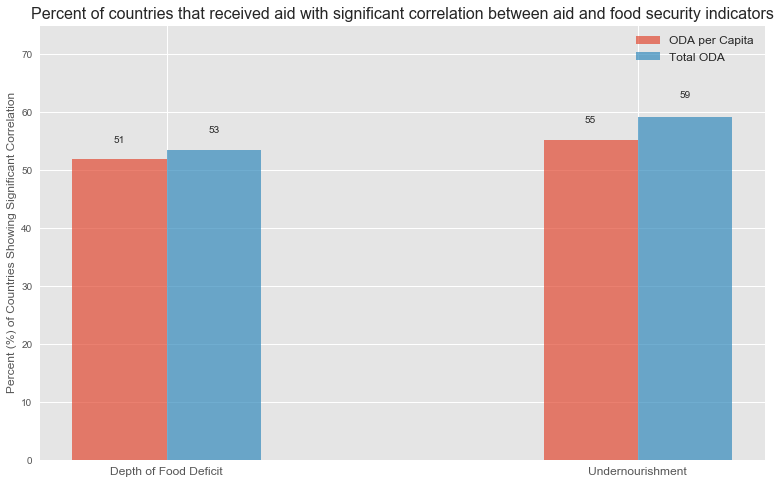

In [32]:
plt.style.use('ggplot')

N = 2
means1 = (results_list[0], results_list[1])

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(13, 8))
rects1 = ax.bar(ind, means1, width, alpha=0.7)

means2 = (results_list[2], results_list[3])
rects2 = ax.bar(ind + width, means2, width, alpha=0.7)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent (%) of Countries Showing Significant Correlation')
ax.set_title('Percent of countries that received aid with significant correlation between aid and food security indicators',size = 16)
ax.set_ylim([0,75])

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Depth of Food Deficit', 'Undernourishment'),size='12')

ax.legend((rects1[0], rects2[0]), ('ODA per Capita', 'Total ODA'),prop={'size': 12})

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

### Save Results to Excel

In [33]:
writer = ExcelWriter('Results_all.xlsx') # Write to file only countries where Spearman p-Value was significant
results_df.to_excel(writer,'ODA per capita vs Food deficit')
results_df2.to_excel(writer,'ODA per capita vs Undernourish')
results_df4.to_excel(writer,'Total ODA vs Food deficit')
results_df5.to_excel(writer,'Total ODA vs Undernourish')
writer.save()

# Step 5. Determine correlation between food security indicators and various forms of aid

In [34]:
data = None # clear data
test_country = None

# Case A
#case = 'Case A'
#indicator_A = 'Debt forgiveness grants (current US$)' # indicator_A is taken as type of aid (e.g. grants, loans etc)
#indicator_B = 'Depth of the food deficit (kilocalories per person per day)' # indicator_B is taken as the indicator for food security

# Case B
#case = 'Case B'
#indicator_A = 'Debt forgiveness grants (current US$)' # indicator_A is taken as type of aid (e.g. grants, loans etc)
#indicator_B = 'Prevalence of undernourishment (% of population)' # indicator_B is taken as the indicator for food security

# Case C
case = 'Case C'
indicator_A = 'Grants, excluding technical cooperation (BoP, current US$)' # indicator_A is taken as type of aid (e.g. grants, loans etc)
indicator_B = 'Depth of the food deficit (kilocalories per person per day)' # indicator_B is taken as the indicator for food security

# Case D
#case = 'Case D'
#indicator_A = 'Grants, excluding technical cooperation (BoP, current US$)' # indicator_A is taken as type of aid (e.g. grants, loans etc)
#indicator_B = 'Prevalence of undernourishment (% of population)' # indicator_B is taken as the indicator for food security

# Create dataframe with desired columns
data = df[df['Indicator Name'].isin([indicator_A, indicator_B])]
test_country=data.loc[data['Country Name'] == 'Cabo Verde'] # Output test
test_country

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
586,Cabo Verde,CPV,Depth of the food deficit (kilocalories per pe...,123.0,124.0,129.0,131.0,130.0,121.0,110.0,99.0,94.0,91.0,91.0,90.0,87.0,82.0,77.0,72.0
593,Cabo Verde,CPV,"Grants, excluding technical cooperation (BoP, ...",44310000.0,24340000.0,42420000.0,59280000.0,71560000.0,74980000.0,59270000.0,80780000.0,113570000.0,119440000.0,138970000.0,88570000.0,66180000.0,70840000.0,63670000.0,61620000.0


In [35]:
# Initialize empty results list
results_type_aid_1=[]

# Store the Country List
countries = data['Country Name'].unique()

for i in countries: # Iterate through the countries
    test_country=data.loc[data['Country Name'] == i] # Get the data in rows associated with country i
    aid_rec = test_country.loc[test_country['Indicator Name'] == indicator_A] # Get row of interest for each country
    
    if np.isnan(np.sum(aid_rec.iloc[0,3:])) == False: # Test if the vector contains only NaN i.e. no aid received
        test_country = test_country.fillna(0) # If some aid was received, then replace any NaN with 0 and perform correlation
        pearson = pearsonr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Pearson correlation and significance level
        spear = spearmanr(test_country.iloc[0,3:],test_country.iloc[1,3:]) # Obtain Spearman correlation and significance level
        results_type_aid_1.append([i,pearson[0],pearson[1], spear[0],spear[1]]) # Add country name, Pearson coeff and sig. level to results list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramD

In [36]:
# Note on results: if a country has NaN pearson coeff. it means the country received some aid between 2000-2015 but had no recorded food security indicator
results_type_aid_1_df=pd.DataFrame(results_type_aid_1,columns=['Country Name','Pearson Coefficient', 'Pearson p-Value', 'Spearman Coefficient', 'Spearman p-Value'])
results_type_aid_1_df

,Country Name,Pearson Coefficient,Pearson p-Value,Spearman Coefficient,Spearman p-Value
0,Afghanistan,-0.941519,5.370280e-08,-0.911636,8.906482e-07
1,Albania,NaN,1.000000e+00,NaN,NaN
2,Algeria,-0.075182,7.819911e-01,-0.167647,5.348568e-01
3,Angola,0.605979,1.284217e-02,0.758824,6.540302e-04
4,Antigua and Barbuda,NaN,1.000000e+00,NaN,NaN
5,Argentina,0.191198,4.781127e-01,0.276389,3.000899e-01
6,Armenia,-0.782027,3.444890e-04,-0.876290,8.521787e-06
7,Aruba,NaN,1.000000e+00,NaN,NaN
8,Azerbaijan,-0.705779,2.250719e-03,-0.621045,1.024132e-02
9,"Bahamas, The",NaN,1.000000e+00,NaN,NaN


In [37]:
results_type_aid_1_fin = results_type_aid_1_df[np.isfinite(results_type_aid_1_df['Pearson Coefficient'])] # Select only entries where Pearson coeff is not NaN
results_type_aid_1_fin = results_type_aid_1_fin.set_index('Country Name') # Set index as country names
num_cty_aid = results_type_aid_1_fin.shape[0] # Get number of countries that received aid and had recorded values of 'depth of food deficit'

# Select only entries where Pearson p-Value is significant (i.e. <0.05)
results_fin_type_aid_1_prs = results_type_aid_1_fin[results_type_aid_1_fin["Pearson p-Value"] < 0.05]
num_cty_aid_sig = results_fin_type_aid_1_prs.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Select only entries where Spearman p-Value is significant
results_fin_type_aid_1_spr = results_type_aid_1_fin[results_type_aid_1_fin["Spearman p-Value"] < 0.05]
num_cty_aid_sig_spr = results_fin_type_aid_1_spr.shape[0] # Get number of countries wth sig. correlation between aid per capita and depth of food deficit

# Results:
Case A

Percent of countries that received Debt forgiveness grants (current USD) and had sig. correlation between Debt forgiveness grants (current USD) and Depth of the food deficit (kilocalories per person per day) (Pearson) = 10.39 %

Percent of countries that received Debt forgiveness grants (current USD) and had sig. correlation between Debt forgiveness grants (current USD) and Depth of the food deficit (kilocalories per person per day) (Spearman) = 45.45 %

Case B

Percent of countries that received Debt forgiveness grants (current USD) and had sig. correlation between Debt forgiveness grants (current USD) and Prevalence of undernourishment (% of population) (Pearson) = 12.5 %

Percent of countries that received Debt forgiveness grants (current USD) and had sig. correlation between Debt forgiveness grants (current USD) and Prevalence of undernourishment (% of population) (Spearman) = 47.22 %

Case C

Percent of countries that received Grants, excluding technical cooperation (BoP, current USD) and had sig. correlation between Grants, excluding technical cooperation (BoP, current USD) and Depth of the food deficit (kilocalories per person per day) (Pearson) = 38.79 %

Percent of countries that received Grants, excluding technical cooperation (BoP, current USD) and had sig. correlation between Grants, excluding technical cooperation (BoP, current USD) and Depth of the food deficit (kilocalories per person per day) (Spearman) = 51.72 %

Case D

Percent of countries that received Grants, excluding technical cooperation (BoP, current USD) and had sig. correlation between Grants, excluding technical cooperation (BoP, current USD) and Prevalence of undernourishment (% of population) (Pearson) = 39.8 %

Percent of countries that received Grants, excluding technical cooperation (BoP, current USD) and had sig. correlation between Grants, excluding technical cooperation (BoP, current USD) and Prevalence of undernourishment (% of population) (Spearman) = 58.16 %



In [38]:
# Compute percent of countries that received aid and had sig. correlation between aid per capita and depth of food deficit
print('Percent of countries that received', indicator_A ,'and had sig. correlation between', indicator_A ,'and', indicator_B ,'(Pearson) =', round((num_cty_aid_sig/num_cty_aid)*100,2),'%') 
print()
print('Percent of countries that received',indicator_A,'and had sig. correlation between',indicator_A,'and',indicator_B,'(Spearman) =', round((num_cty_aid_sig_spr/num_cty_aid)*100,2),'%')

Percent of countries that received Grants, excluding technical cooperation (BoP, current US$) and had sig. correlation between Grants, excluding technical cooperation (BoP, current US$) and Depth of the food deficit (kilocalories per person per day) (Pearson) = 38.79 %

Percent of countries that received Grants, excluding technical cooperation (BoP, current US$) and had sig. correlation between Grants, excluding technical cooperation (BoP, current US$) and Depth of the food deficit (kilocalories per person per day) (Spearman) = 51.72 %


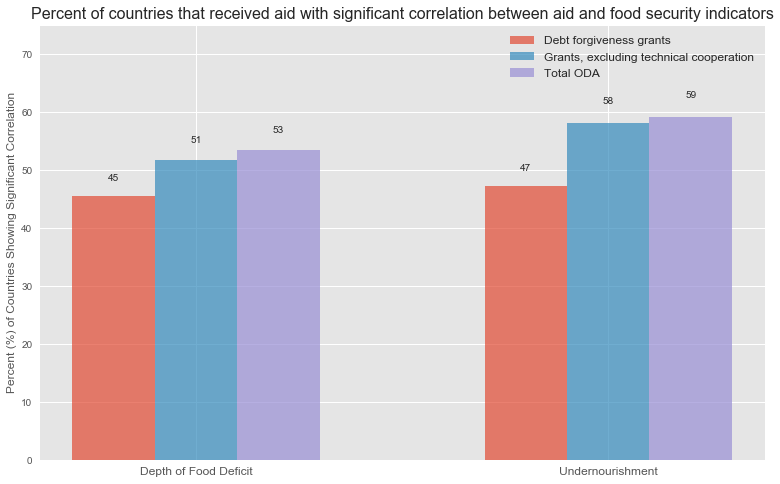

In [39]:
plt.style.use('ggplot')

N = 2
means1 = (45.45, 47.22)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(13, 8))
rects1 = ax.bar(ind, means1, width, alpha=0.7)

means2 = (51.72, 58.16)
rects2 = ax.bar(ind + width, means2, width, alpha=0.7)

means3 = (results_list[2], results_list[3])
rects3 = ax.bar(ind + 2*width, means3, width, alpha=0.7)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent (%) of Countries Showing Significant Correlation')
ax.set_title('Percent of countries that received aid with significant correlation between aid and food security indicators',size = 16)
ax.set_ylim([0,75])

ax.set_xticks(ind + 2*width / 2)
ax.set_xticklabels(('Depth of Food Deficit', 'Undernourishment'),size='12')

ax.legend((rects1[0], rects2[0], rects3[0]), ('Debt forgiveness grants', 'Grants, excluding technical cooperation', 'Total ODA'),prop={'size': 12})

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

### Save results to Excel

In [40]:
import os

# If file does not exist, create new one
if not os.path.exists('Results_Type_of_Aid.xlsx'):
    writer = ExcelWriter('Results_Type_of_Aid.xlsx') # Create file if it does not already exist
    results_type_aid_1_df.to_excel(writer,case)
    writer.save()

# If file already exists, append a new worksheet
from openpyxl import load_workbook

book = load_workbook('Results_Type_of_Aid.xlsx')
writer = pd.ExcelWriter('Results_Type_of_Aid.xlsx', engine = 'openpyxl')
writer.book = book

if case in book.get_sheet_names(): # Remove sheet named case if it exists
    book.remove_sheet(book.get_sheet_by_name(case))

results_type_aid_1_df.to_excel(writer,sheet_name = case)

writer.save()
writer.close()